# Now, let's take a look at the technology trend in toronto from a year ago.

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import genfromtxt

In [26]:
# Read the data from the result of the query file
#Download data from "http://data.stackexchange.com/stackoverflow/query/edit/877382"
df=pd.read_csv("Toronto20170708_20180707.csv", sep=',')
len(df)

11707

In [49]:
df1 = df.loc[:, ['Date','TagName','TagId']].sort_values(('Date'),ascending=False)
#print('We are investigating', len(df1), 'posts from', min(df1['Date']),'to', max(df1['Date']),'on a weekly basis.')
#print('df1\n', df1)
dates =  pd.to_datetime(df1.Date, format='%Y-%m-%d %H:%M:%S')
#print(dates)
df1 = df1.assign(date=dates).set_index('date').groupby(['TagName', pd.Grouper(freq='7D')]).count().reset_index()  
df3 = df1.loc[:, ['date','TagName','TagId']]
#print('df3\n', df3)
df5 = df3.sort_values('date', ascending=False)
#print(df5.head(10))


In [50]:
df5['TagName'] = df5['TagName'].astype('category')
df5 = df5.sort_values('date', ascending=False)
#df5 = df5.set_index('date')
#df6['day'] = df6.index.day
#df5 = df5.sort_values('day')
grouped = df5.groupby(['TagName'])
#print(df5)

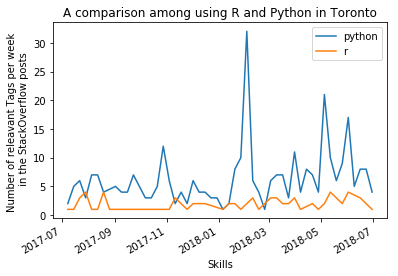

In [51]:
fig, ax = plt.subplots()
for key , group in grouped:
    if key in {'python', 'r'}:
        group.plot('date', 'TagId', label=key, ax=ax)
plt.legend(loc='best')
plt.title('A comparison among using R and Python in Toronto')
plt.xlabel("Skills");
plt.ylabel("Number of releavant Tags per week \n in the StackOverflow posts");
plt.show()